In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

zip_file_path = 'archive.zip'

extract_dir = './satelite'

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Successfully extracted files to {extract_dir}")


Successfully extracted files to ./satelite


In [2]:
data = pd.DataFrame(columns=['image_path', 'label'])

labels = {'./satelite/data/cloudy' : 'Cloudy',
          './satelite/data/desert' : 'Desert',
          './satelite/data/green_area' : 'Green_Area',
          './satelite/data/water' : 'Water',
           }

for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)


data.to_csv('image_dataset.csv', index=False)
df = pd.read_csv("image_dataset.csv")



Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-2-f4c6db9c6372>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-2-f4c6db9c6372>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-2-f4c6db9c6372>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'image_path': image_path, 'label': label}, ignore_index=True)
<ipython-input-2-f4c6db9c6372>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.app

In [4]:
df.head

<bound method NDFrame.head of                                   image_path   label
0      ./satelite/data/cloudy/train_9843.jpg  Cloudy
1     ./satelite/data/cloudy/train_30949.jpg  Cloudy
2     ./satelite/data/cloudy/train_19396.jpg  Cloudy
3      ./satelite/data/cloudy/train_2796.jpg  Cloudy
4     ./satelite/data/cloudy/train_19502.jpg  Cloudy
...                                      ...     ...
5626  ./satelite/data/water/SeaLake_1541.jpg   Water
5627  ./satelite/data/water/SeaLake_2394.jpg   Water
5628  ./satelite/data/water/SeaLake_2946.jpg   Water
5629  ./satelite/data/water/SeaLake_1469.jpg   Water
5630    ./satelite/data/water/SeaLake_35.jpg   Water

[5631 rows x 2 columns]>

In [3]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)

<ipython-input-7-299e3a25d70c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)


Epoch 1/5
141/141 [==============================] - 1383s 10s/step - loss: 0.7165 - accuracy: 0.6226 - val_loss: 0.4285 - val_accuracy: 0.8412
Epoch 2/5
141/141 [==============================] - 1296s 9s/step - loss: 0.4746 - accuracy: 0.7895 - val_loss: 0.4300 - val_accuracy: 0.7853
Epoch 3/5
141/141 [==============================] - 1275s 9s/step - loss: 0.5356 - accuracy: 0.7047 - val_loss: 0.4994 - val_accuracy: 0.6806
Epoch 4/5
141/141 [==============================] - 1281s 9s/step - loss: 0.4461 - accuracy: 0.7733 - val_loss: 0.3506 - val_accuracy: 0.8607
Epoch 5/5
141/141 [==============================] - 1268s 9s/step - loss: 0.4889 - accuracy: 0.7451 - val_loss: 0.4297 - val_accuracy: 0.7613


In [8]:
num_samples = test_df.shape[0]
num_samples

1127

In [9]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 [==============================] - 90s 2s/step - loss: 0.4297 - accuracy: 0.7613


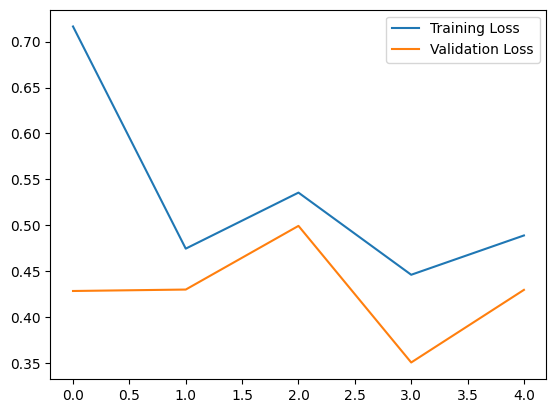

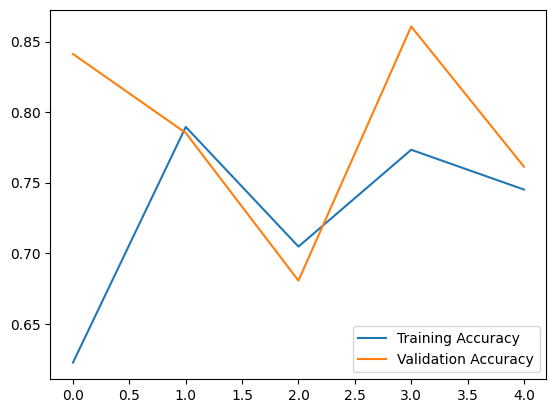

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
from tensorflow.keras.models import load_model

model.save('Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model = load_model("Model.h5")

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [14]:
img = load_img("./satelite/data/green_area/Forest_2000.jpg", target_size=(255, 255))

In [15]:
img_array = img_to_array(img)

In [16]:
img_array = img_array / 255.0

In [17]:
img_array = np.reshape(img_array, (1, 255, 255, 3))

In [18]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 257ms/step


In [19]:
class_index = np.argmax(predictions[0])
predicted_label = class_names[class_index]

print("Gambar tersebut adalah '{}'.".format(predicted_label))

Gambar tersebut adalah 'Green_Area'.
